Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data

df= pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
#display the head of dataframe
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#checking shape of data
df.shape

(1000, 40)

In [5]:
#checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#checking for null values in the data
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#checking the unique values in the column
df['_c39'].unique()

array([nan])

In [8]:
#checking value counts for column 

df['_c39'].value_counts()

Series([], Name: _c39, dtype: int64)

In [9]:
#dropping the column because it doesnt have any data
df.drop(['_c39'],axis=1,inplace=True)

<AxesSubplot:>

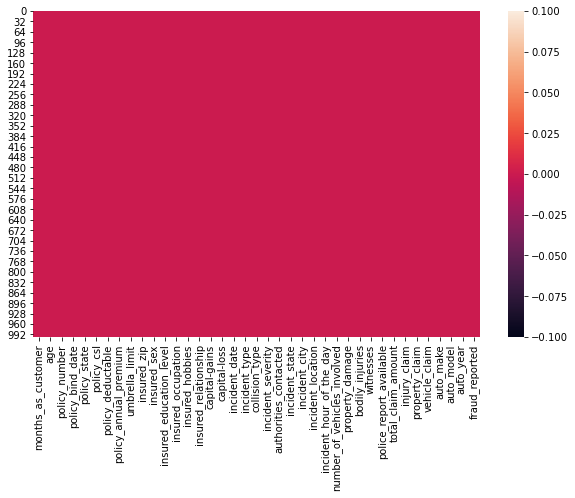

In [11]:
#making heatmap for checking null values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [12]:
#describing the data
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [13]:
#checking for unique values
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

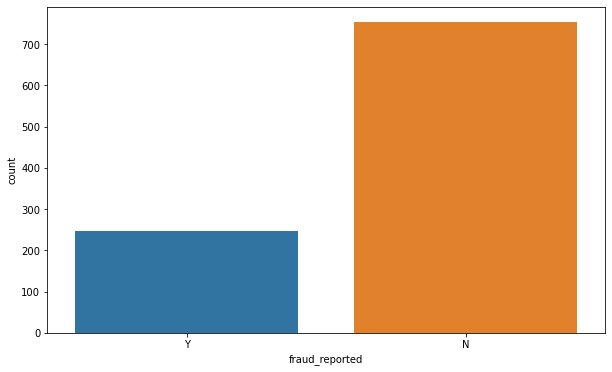

In [14]:
#checking data of targetteed variable
plt.figure(figsize=(10,6))
sns.countplot(df['fraud_reported'])

data is imbalanced

<AxesSubplot:xlabel='incident_state', ylabel='count'>

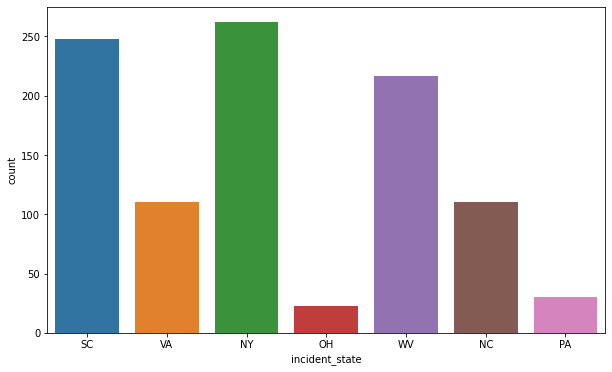

In [15]:
#plotting bar to get the counts classification in the column
plt.figure(figsize=(10,6))
sns.countplot(df['incident_state'])

most of the incidents were happend in ny and sc

In [16]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [17]:
#checking value couunts for pplice reports for claim
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

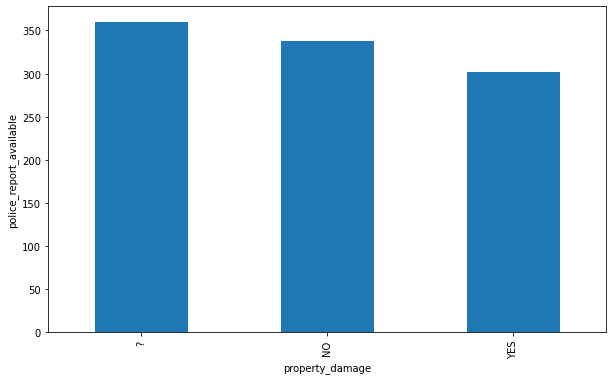

In [18]:
#plotting bar to get the counts classification in the column
plt.figure(figsize=(10,6))
bar=df.groupby('property_damage').police_report_available.count().plot.bar()
bar.set_ylabel('police_report_available')
bar.set_xticklabels(bar.get_xticklabels());

it shows most of the claimers doesn't have police reports

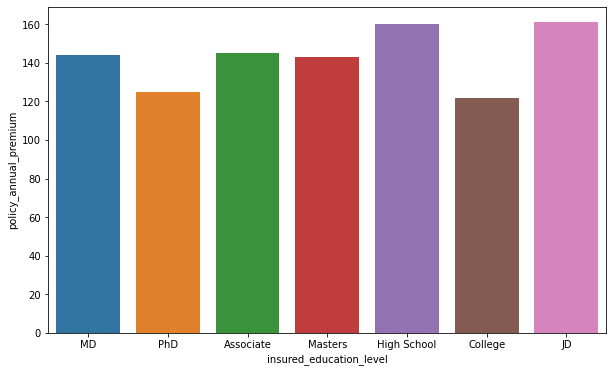

In [19]:
#plotting bar to get the counts classification in the column
fig = plt.figure(figsize=(10,6))
bar=sns.countplot(x ='insured_education_level', data = df)
bar.set_ylabel('policy_annual_premium')
plt.show()

high school and jd educates have the maximum annual premium

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

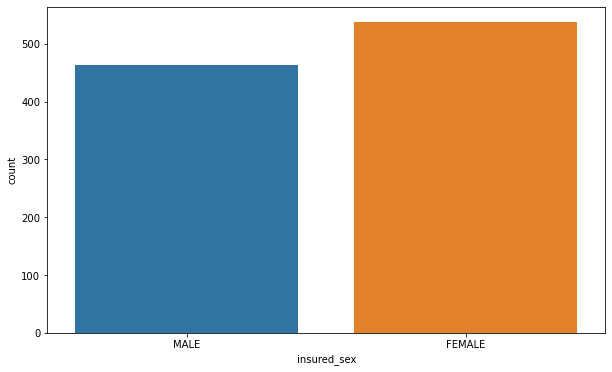

In [20]:
#plotting bar to get the counts classification in the column
plt.figure(figsize=(10,6))
sns.countplot(df['insured_sex'])

most of females have claim for isurance

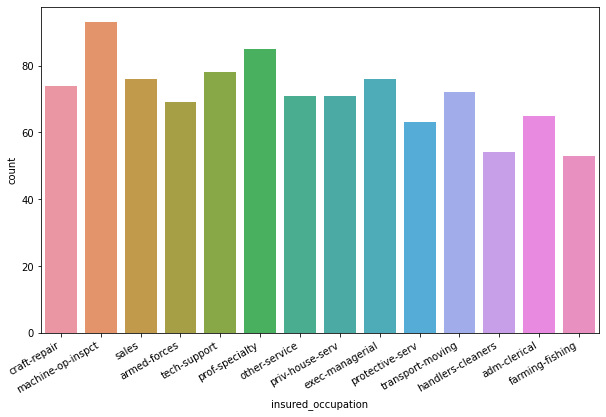

In [21]:
#plotting bar to get the counts classification in the column
fig = plt.figure(figsize=(10,6))
bar = sns.countplot(x='insured_occupation',data = df)
bar.set_xticklabels(bar.get_xticklabels(), rotation=30, ha="right");

most of the claimers have worked under machine opt ispect

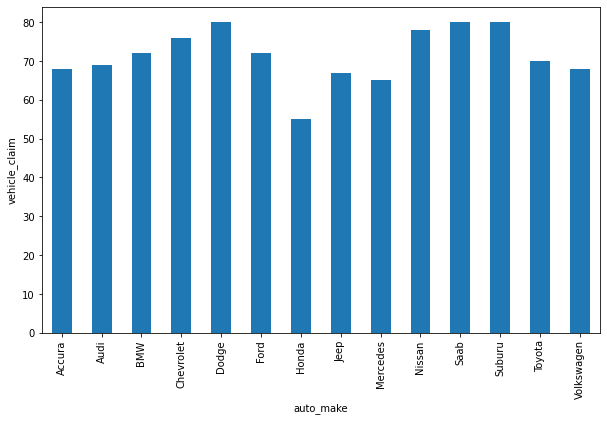

In [22]:
#plotting bar to get the counts classification in the column
plt.figure(figsize=(10,6))
bar=df.groupby('auto_make').police_report_available.count().plot.bar()
bar.set_ylabel('vehicle_claim')
bar.set_xticklabels(bar.get_xticklabels());

dodge,saab and suburu owners claims the more for their vehicles while honda owners do less

In [23]:
#checking for value counts in the particular column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [24]:
#replacing the obj into int
df['fraud_reported']=df['fraud_reported'].replace({'n':0,'y':1})

In [25]:
#getting the exact numbers for age og vehicle
df['vehicle_age']= 2018-df['auto_year']
df['vehicle_age'].head()

0    14
1    11
2    11
3     4
4     9
Name: vehicle_age, dtype: int64

In [27]:
#displaying maximum columns
pd.set_option('display.max_columns',None)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,vehicle_age
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,14
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,11
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,11
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,4
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,9


In [28]:
#replacing the obj into int
df['collision_type']=df['collision_type'].replace('?','NA')

In [29]:
#checking for value counts in the particular column
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
NA                 178
Name: collision_type, dtype: int64

In [30]:
#replacing the obj into int
df['property_damage']=df['property_damage'].replace('?','NO')

In [31]:
#checking for value counts in the particular column
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [32]:
#replacing the obj into int
df['property_damage']=df.property_damage.replace({'NO':0,'YES':1})

In [33]:
#replacing the obj into int
df['police_report_available']=df['police_report_available'].replace('?','NO')

In [34]:
#checking for value counts in the particular column
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [38]:
#checking for value counts in the particular column
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [39]:
#replacing the obj into int
df['insured_sex']=df.insured_sex.replace({'FEMALE':0,'MALE':1})

In [40]:
#checking for value counts in the particular column
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [41]:
#checking for value counts in the particular column
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [42]:
#dropping the columns which will not use
df.drop(columns=['policy_number','policy_bind_date','insured_zip','incident_date','incident_location','auto_year'],inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,OH,250/500,1000,1406.91,0,1,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,1,1,2,1,71610,6510,13020,52080,Saab,92x,Y,14
1,228,42,IN,250/500,2000,1197.22,5000000,1,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,NA,Minor Damage,Police,VA,Riverwood,8,1,0,0,0,0,5070,780,780,3510,Mercedes,E400,Y,11
2,134,29,OH,100/300,2000,1413.14,5000000,0,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,0,2,3,0,34650,7700,3850,23100,Dodge,RAM,N,11
3,256,41,IL,250/500,2000,1415.74,6000000,0,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,0,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,Y,4
4,228,44,IL,500/1000,1000,1583.91,6000000,1,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,NA,Minor Damage,None,NY,Arlington,20,1,0,0,1,0,6500,1300,650,4550,Accura,RSX,N,9


# Encoding

In [43]:
#label encoding
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [44]:
#displaying head
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,vehicle_age
0,328,48,2.0,1.0,1000,1406.91,0,1,4.0,2.0,17.0,0.0,53300,0,2.0,3.0,0.0,4.0,4.0,1.0,5,1,1,1,2,1,71610,6510,13020,52080,10.0,1.0,1.0,14
1,228,42,1.0,1.0,2000,1197.22,5000000,1,4.0,6.0,15.0,2.0,0,0,3.0,1.0,1.0,4.0,5.0,5.0,8,1,0,0,0,0,5070,780,780,3510,8.0,12.0,1.0,11
2,134,29,2.0,0.0,2000,1413.14,5000000,0,6.0,11.0,2.0,3.0,35100,0,0.0,2.0,1.0,4.0,1.0,1.0,7,3,0,2,3,0,34650,7700,3850,23100,4.0,30.0,0.0,11
3,256,41,0.0,1.0,2000,1415.74,6000000,0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,5,1,0,1,2,0,63400,6340,6340,50720,3.0,34.0,1.0,4
4,228,44,0.0,2.0,1000,1583.91,6000000,1,0.0,11.0,2.0,4.0,66000,-46000,3.0,1.0,1.0,2.0,1.0,0.0,20,1,0,0,1,0,6500,1300,650,4550,0.0,31.0,0.0,9


In [45]:
#import lib and removing outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
df_new= df[(z<3).all(axis = 1)]

In [46]:
#shape before removing outliers
df.shape

(1000, 34)

In [47]:
#shape after removing outliers
df_new.shape

(980, 34)

In [48]:
df=df_new

In [49]:
df.shape

(980, 34)

months_as_customer


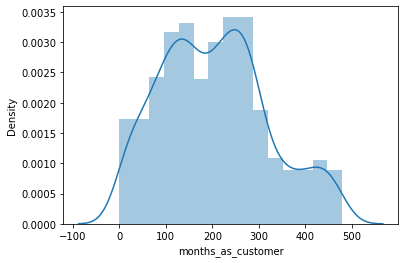

age


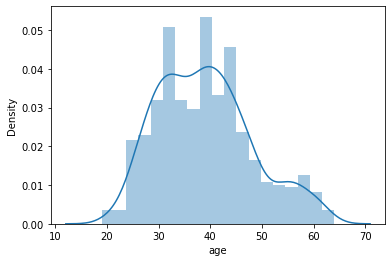

policy_state


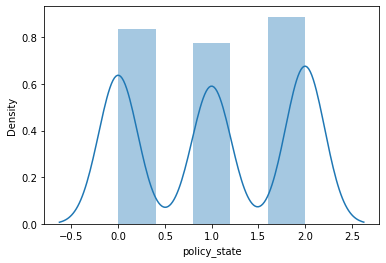

policy_csl


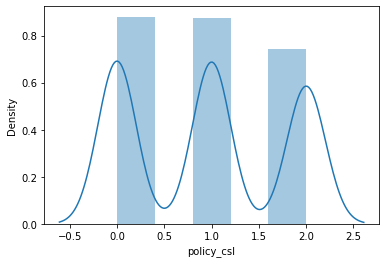

policy_deductable


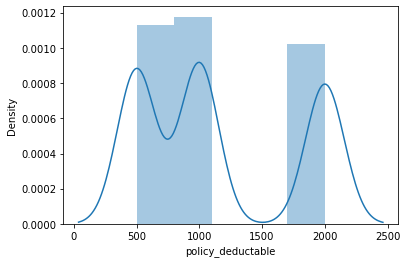

policy_annual_premium


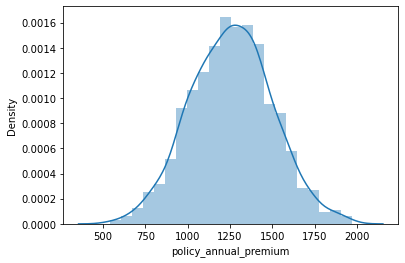

umbrella_limit


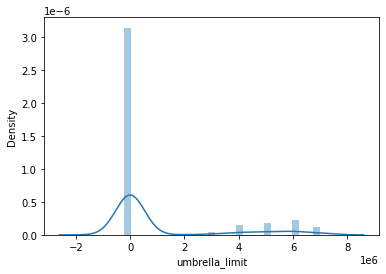

insured_sex


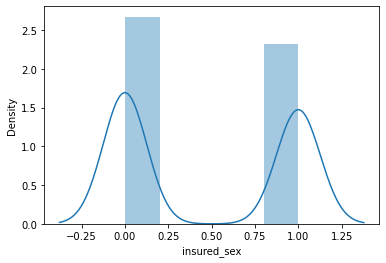

insured_education_level


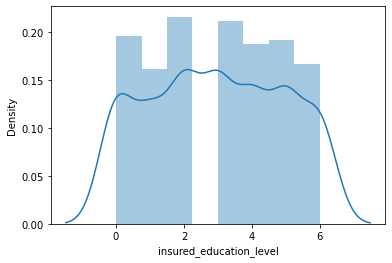

insured_occupation


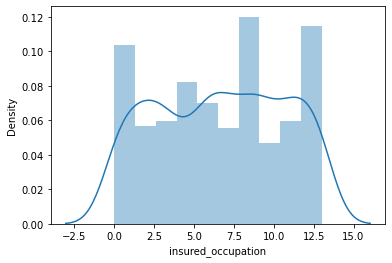

insured_hobbies


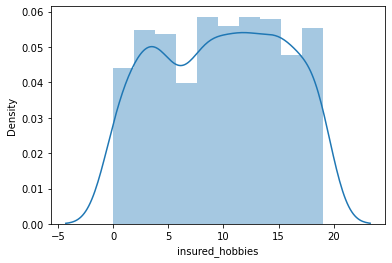

insured_relationship


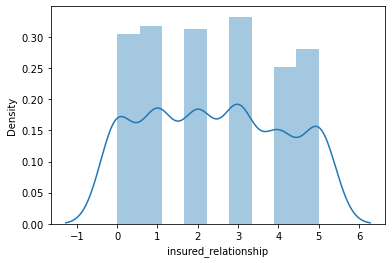

capital-gains


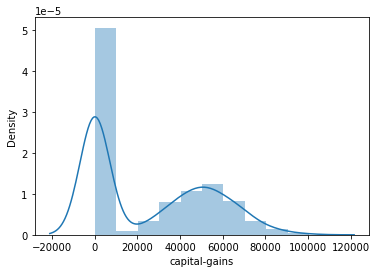

capital-loss


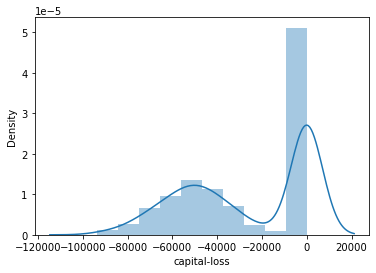

incident_type


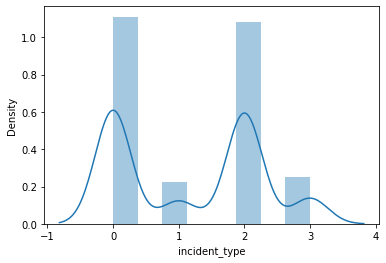

collision_type


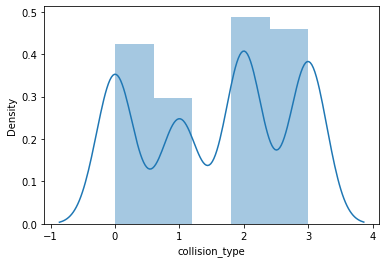

incident_severity


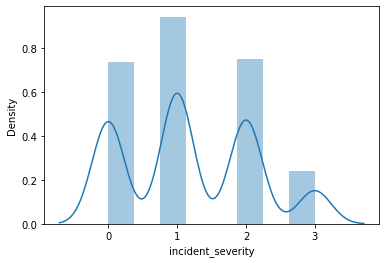

authorities_contacted


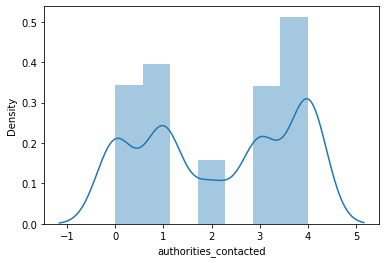

incident_state


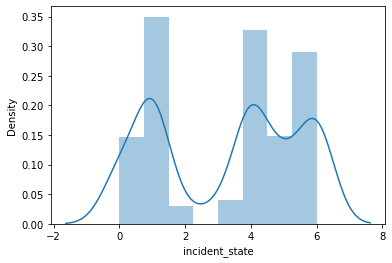

incident_city


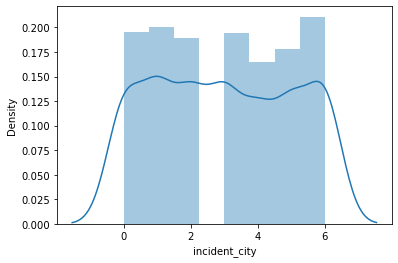

incident_hour_of_the_day


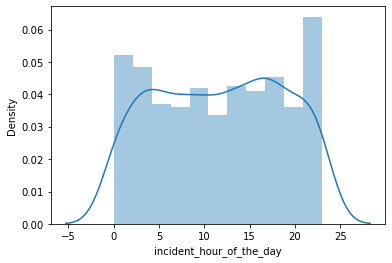

number_of_vehicles_involved


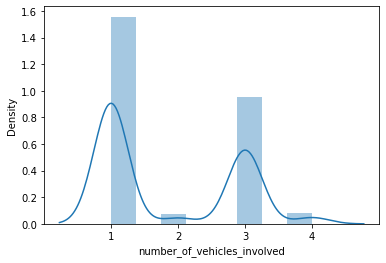

property_damage


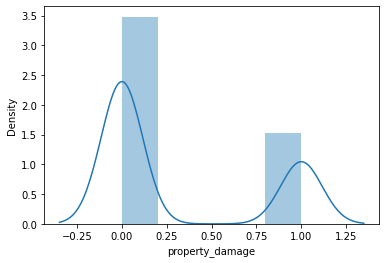

bodily_injuries


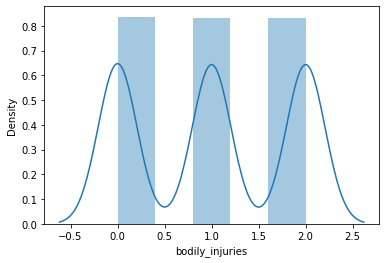

witnesses


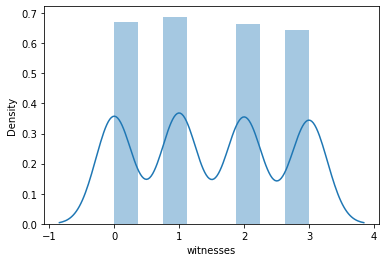

police_report_available


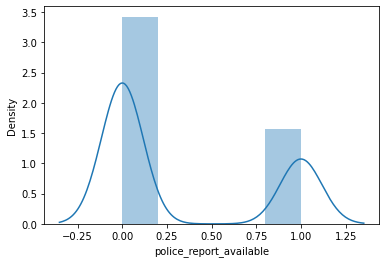

total_claim_amount


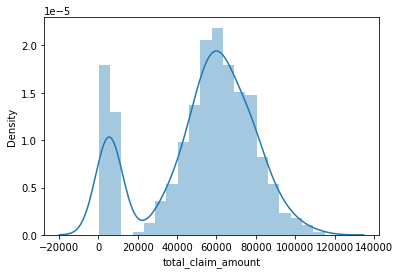

injury_claim


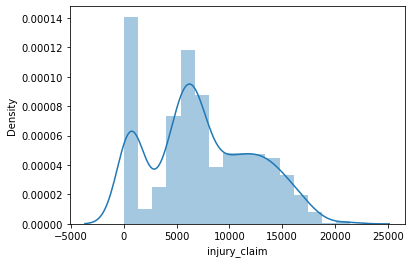

property_claim


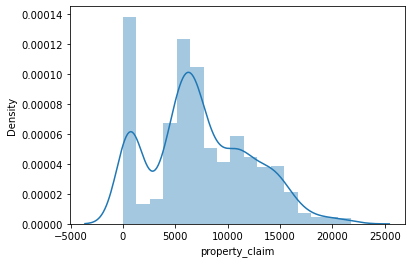

vehicle_claim


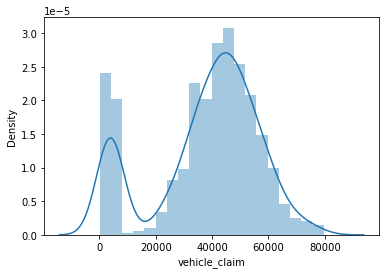

auto_make


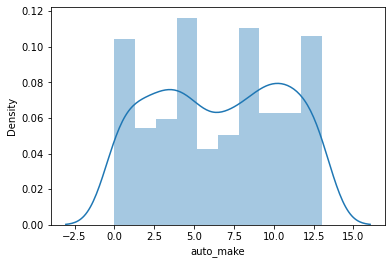

auto_model


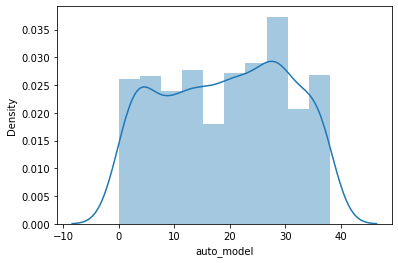

fraud_reported


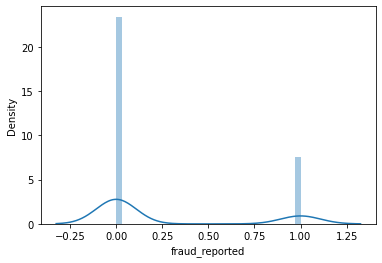

vehicle_age


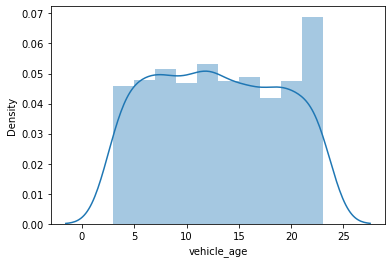

In [51]:
#checking for skewness in the columns by plloting bar
for columns in df:
    print(columns)
    sns.distplot(df[columns])
    plt.show()
    

In [50]:
#checking for skewness in the columns
df.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.178487
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_hour_of_the_day      -0.039280
number_of_vehicles_involved    0.509725
property_damage                0.853093
bodily_injuries                0.003757
witnesses                      0.026211


In [52]:
#splitting the data
x = df.drop('fraud_reported',axis =1)
y = df['fraud_reported']

In [53]:
#scalling the data using standard scaler
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(x)
x= pd.DataFrame(x,columns=x.columns)

In [57]:
#valancing the data because data is imbalanced
from imblearn.over_sampling import SMOTE

oversample= SMOTE(k_neighbors=3)
x,y = oversample.fit_resample(x,y)

In [58]:
x.shape

(1480, 33)

In [59]:
y.shape

(1480,)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [64]:
#train the model
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=i)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu > maxAccu:
        maxAccu= accu
        maxRS =i
print('best accuracy score is ',maxAccu,'random state is ',i)    

best accuracy score is  0.6189189189189189 random state is  99


In [65]:
#training the model
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=99)

In [70]:
#using logistic regression to get the accuarcy score 
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
print('accuracy score is ',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is  0.581081081081081
[[ 94  87]
 [ 68 121]]
              precision    recall  f1-score   support

         0.0       0.58      0.52      0.55       181
         1.0       0.58      0.64      0.61       189

    accuracy                           0.58       370
   macro avg       0.58      0.58      0.58       370
weighted avg       0.58      0.58      0.58       370



In [76]:
#cross validation of accuracy score
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(lg,x,y,cv=5)
print('coss validation score is',cvs.mean())

coss validation score is 0.5614864864864865


In [72]:
#using Decision Tree Classifier to get the accuarcy score 
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred = dtr.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score 0.8486486486486486
[[149  32]
 [ 24 165]]
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84       181
         1.0       0.84      0.87      0.85       189

    accuracy                           0.85       370
   macro avg       0.85      0.85      0.85       370
weighted avg       0.85      0.85      0.85       370



In [78]:
#cross validation of accuracy score
cvs= cross_val_score(dtr,x,y, cv=5)
print('cross val score is',cvs.mean())

cross val score is 0.8331081081081081


In [80]:
#using KNeighbors Classifier to get the accuarcy score 
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('accuracy score is ',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score is  0.7054054054054054
[[106  75]
 [ 34 155]]
              precision    recall  f1-score   support

         0.0       0.76      0.59      0.66       181
         1.0       0.67      0.82      0.74       189

    accuracy                           0.71       370
   macro avg       0.72      0.70      0.70       370
weighted avg       0.71      0.71      0.70       370



In [81]:
#cross validation of accuracy score
cvs= cross_val_score(knn,x,y,cv=5)
print('cross val score is ',cvs.mean())

cross val score is  0.7128378378378379


In [85]:
#using Random Forest Classifier to get the accuarcy score 
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
rfc.fit(x_train,y_train)
pred= rfc.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score 0.8864864864864865
[[162  19]
 [ 23 166]]
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       181
         1.0       0.90      0.88      0.89       189

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



In [86]:
#cross validation of accuracy score
cvs = cross_val_score(rfc,x,y,cv=5)
print('cross validation score is',cvs.mean())

cross validation score is 0.8547297297297298


In [88]:
#using support vector Classifier to get the accuarcy score 
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
pred= svc.predict(x_test)
print('accuarcy score is',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuarcy score is 0.4972972972972973
[[144  37]
 [149  40]]
              precision    recall  f1-score   support

         0.0       0.49      0.80      0.61       181
         1.0       0.52      0.21      0.30       189

    accuracy                           0.50       370
   macro avg       0.51      0.50      0.45       370
weighted avg       0.51      0.50      0.45       370



In [89]:
#cross validation of accuracy score
cvs = cross_val_score(svc,x,y,cv=5)
print('cross validation score is',cvs.mean())

cross validation score is 0.5047297297297296


In [90]:
#using Ada Boost Classifier to get the accuarcy score 
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.8918918918918919
[[164  17]
 [ 23 166]]
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89       181
         1.0       0.91      0.88      0.89       189

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



In [91]:
#cross validation of accuracy score
cvs = cross_val_score(ada,x,y,cv=5)
print('cross validation score is',cvs.mean())

cross validation score is 0.8554054054054054


so the best fited model is ada boost classifier

In [92]:
#hyper parameter tunning of the best result
from sklearn.model_selection import RandomizedSearchCV

parameters= { 'n_estimators': [1, 100],'learning_rate' : [0.01,0.05,0.1,0.3,1],'algorithm' : ['SAMME', 'SAMME.R']}

In [95]:
#hyper parameter tunning of the best result
rsc= RandomizedSearchCV(ada,param_distributions=parameters,cv=5, n_iter = 10, n_jobs=-1) 
rsc.fit(x_train,y_train)
rsc.best_params_

{'n_estimators': 100, 'learning_rate': 0.3, 'algorithm': 'SAMME'}

In [98]:
#putting the tunned score in the model
final = AdaBoostClassifier(n_estimators=100, learning_rate=0.3,algorithm='SAMME')
final.fit(x_train,y_train)
pred= final.predict(x_test)
accu= ('accuracy score is ',accuracy_score(y_test,pred))
print(accu)


('accuracy score is ', 0.8594594594594595)


roc auc score 0.8596275833844894


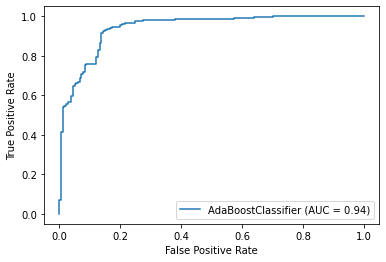

In [100]:
#plotting the roc curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

print('roc auc score',roc_auc_score(y_test,pred))
plot_roc_curve(final,x_test,y_test)
plt.show()

In [103]:
#saving the model
import joblib
joblib.dump(final,'fraud_prediction.pkl')

['fraud_prediction.pkl']

In [104]:
#loading the model
model = joblib.load('fraud_prediction.pkl')

In [105]:
#fitting the model in the dataset
pred = model.predict(x_test)
prediction= pd.DataFrame(pred)

In [108]:
#predictions
prediction.to_csv('result.csv')
prediction

,0
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
365,1.0
366,1.0
367,1.0
368,0.0
